In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_forest=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

# Exploratory data analysis

### Data preprocessing and clearning Opertaion

In [3]:
dataset_forest.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
dataset_forest.drop([122,123],inplace=True,axis=0)
dataset_forest.reset_index(inplace=True)
dataset_forest.drop('index',axis=1,inplace=True)

In [5]:
dataset_forest.shape

(244, 14)

In [6]:
dataset_forest.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
dataset_forest.rename(columns={' RH':'RH',' Ws':'Ws','Rain ':'Rain','Classes  ':'Classes'},inplace=True)

In [8]:
dataset_forest['Classes']=dataset_forest['Classes'].str.strip()

In [9]:
dataset_forest['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [10]:
dataset_forest.loc[:122,'region']='bejaia'
dataset_forest.loc[122:,'region']='Sidi-Bel Abbes'

In [11]:
dataset_forest.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [12]:
dataset_forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [13]:
dataset_forest.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,2,2
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,bejaia
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,137,122


In [14]:
dataset_forest.index[dataset_forest['DC']=='14.6 9']

Int64Index([165], dtype='int64')

In [15]:
dataset_forest.loc[165,'DC']=14.6

In [16]:
dataset_forest.loc[165,'FWI']=dataset_forest['FWI'].mode()[0]

In [17]:
dataset_forest.fillna(method='bfill', inplace=True)

In [18]:
dataset_forest=dataset_forest.astype({'day':int,'month':int,'year':int,'Temperature':int,'RH':int,'Ws':int})

In [19]:
dataset_forest=dataset_forest.astype({'Rain':float,'FFMC':float,'DMC':float,'DC':float,'ISI':float,'BUI':float,'FWI':float})

In [20]:
dataset_forest

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,Sidi-Bel Abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


###  Statistical Information of the  Dataset

In [21]:
dataset_forest.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4


### Chcek the NaN or Null value

<AxesSubplot:>

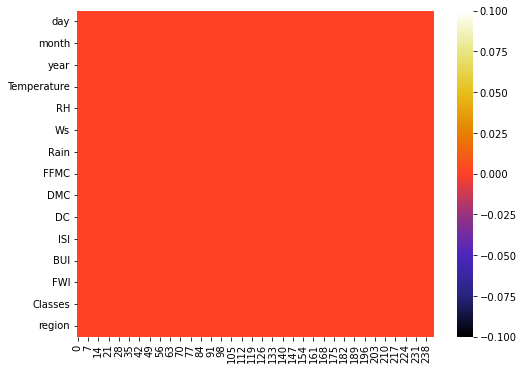

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset_forest.isna().transpose(),
            cmap='CMRmap')

In [23]:
numeric_features = [i for i in dataset_forest.columns if dataset_forest[i].dtype!='O']
categorical_features = [i for i in dataset_forest.columns if dataset_forest[i].dtype=='O']

In [24]:
 numeric_features

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

### Univariate Analysis

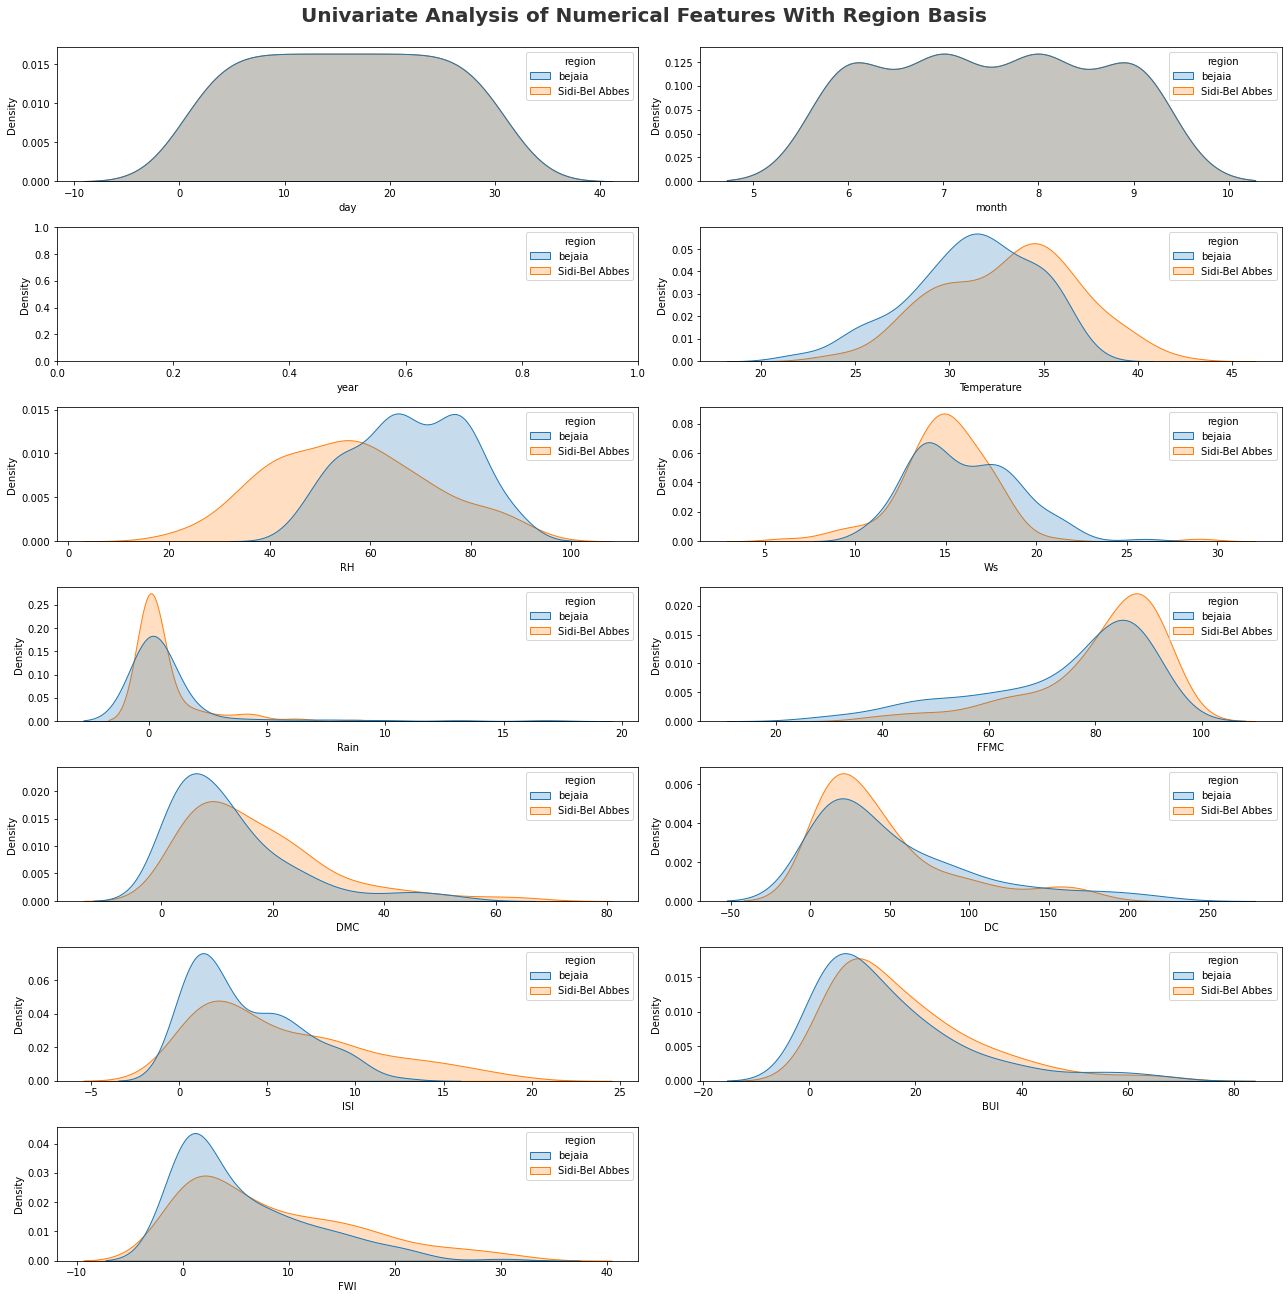

In [25]:
plt.figure(figsize=(18,18))
plt.suptitle('Univariate Analysis of Numerical Features With Region Basis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(7, 2, i+1)
    sns.kdeplot(x=dataset_forest[numeric_features[i]],shade=True,hue='region',data=dataset_forest)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

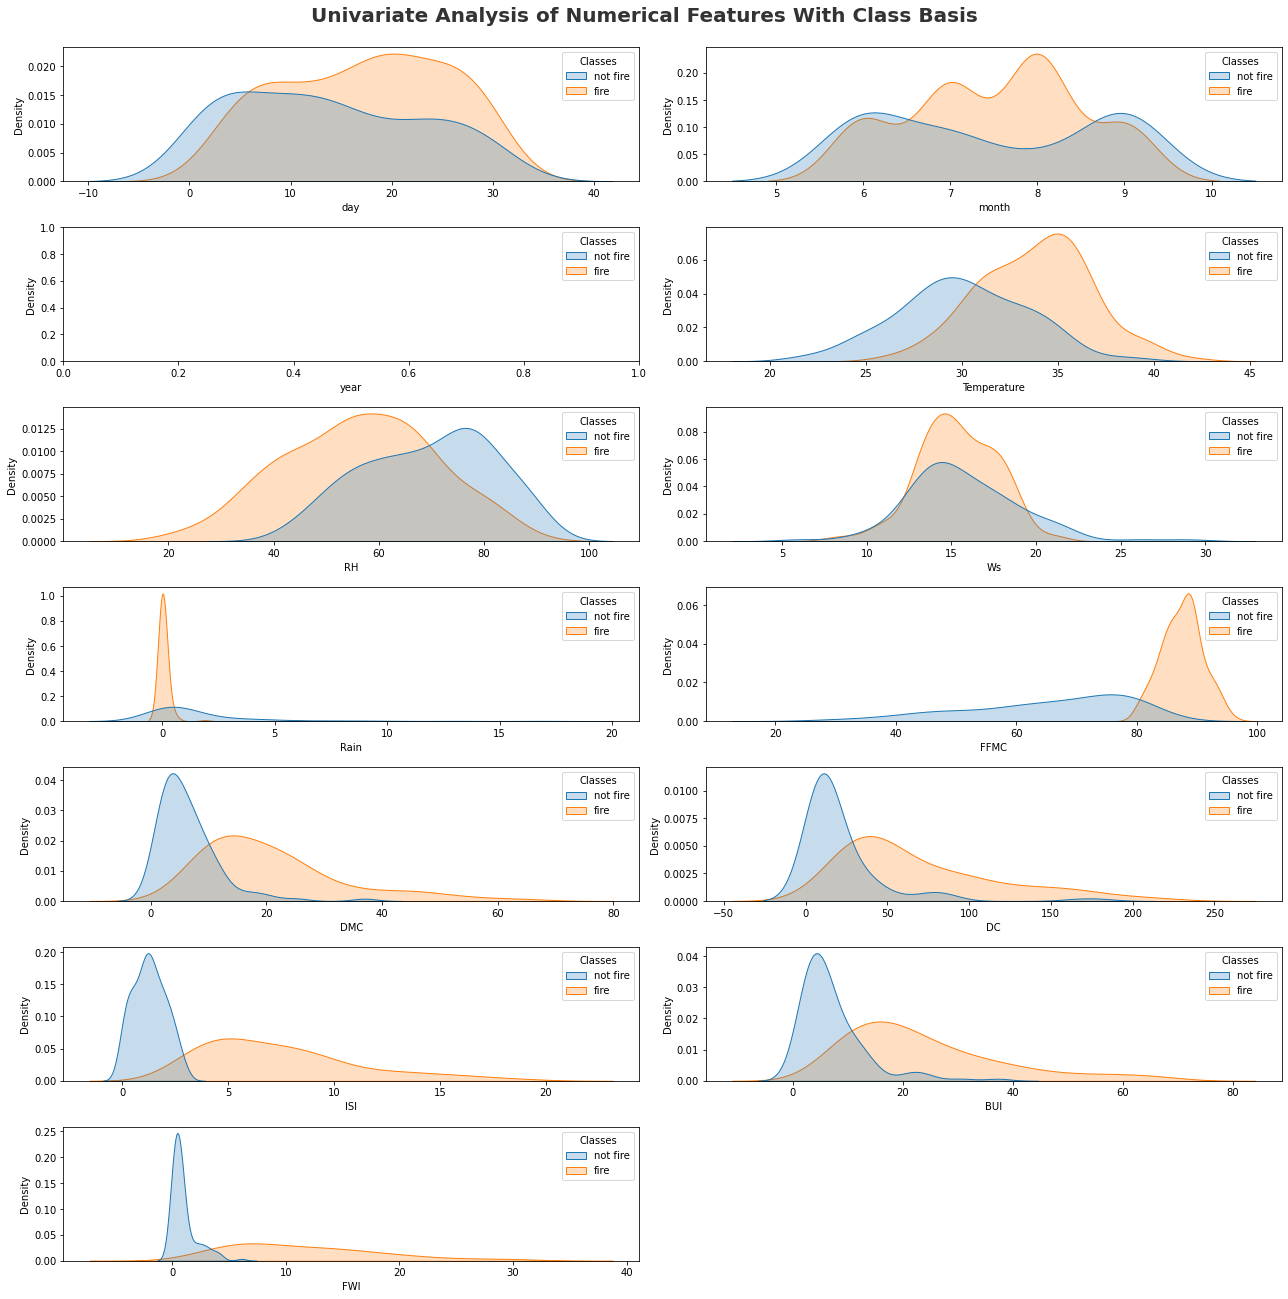

In [26]:
plt.figure(figsize=(18,18))
plt.suptitle('Univariate Analysis of Numerical Features With Class Basis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(7, 2, i+1)
    sns.kdeplot(x=dataset_forest[numeric_features[i]],shade=True,hue='Classes',data=dataset_forest)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

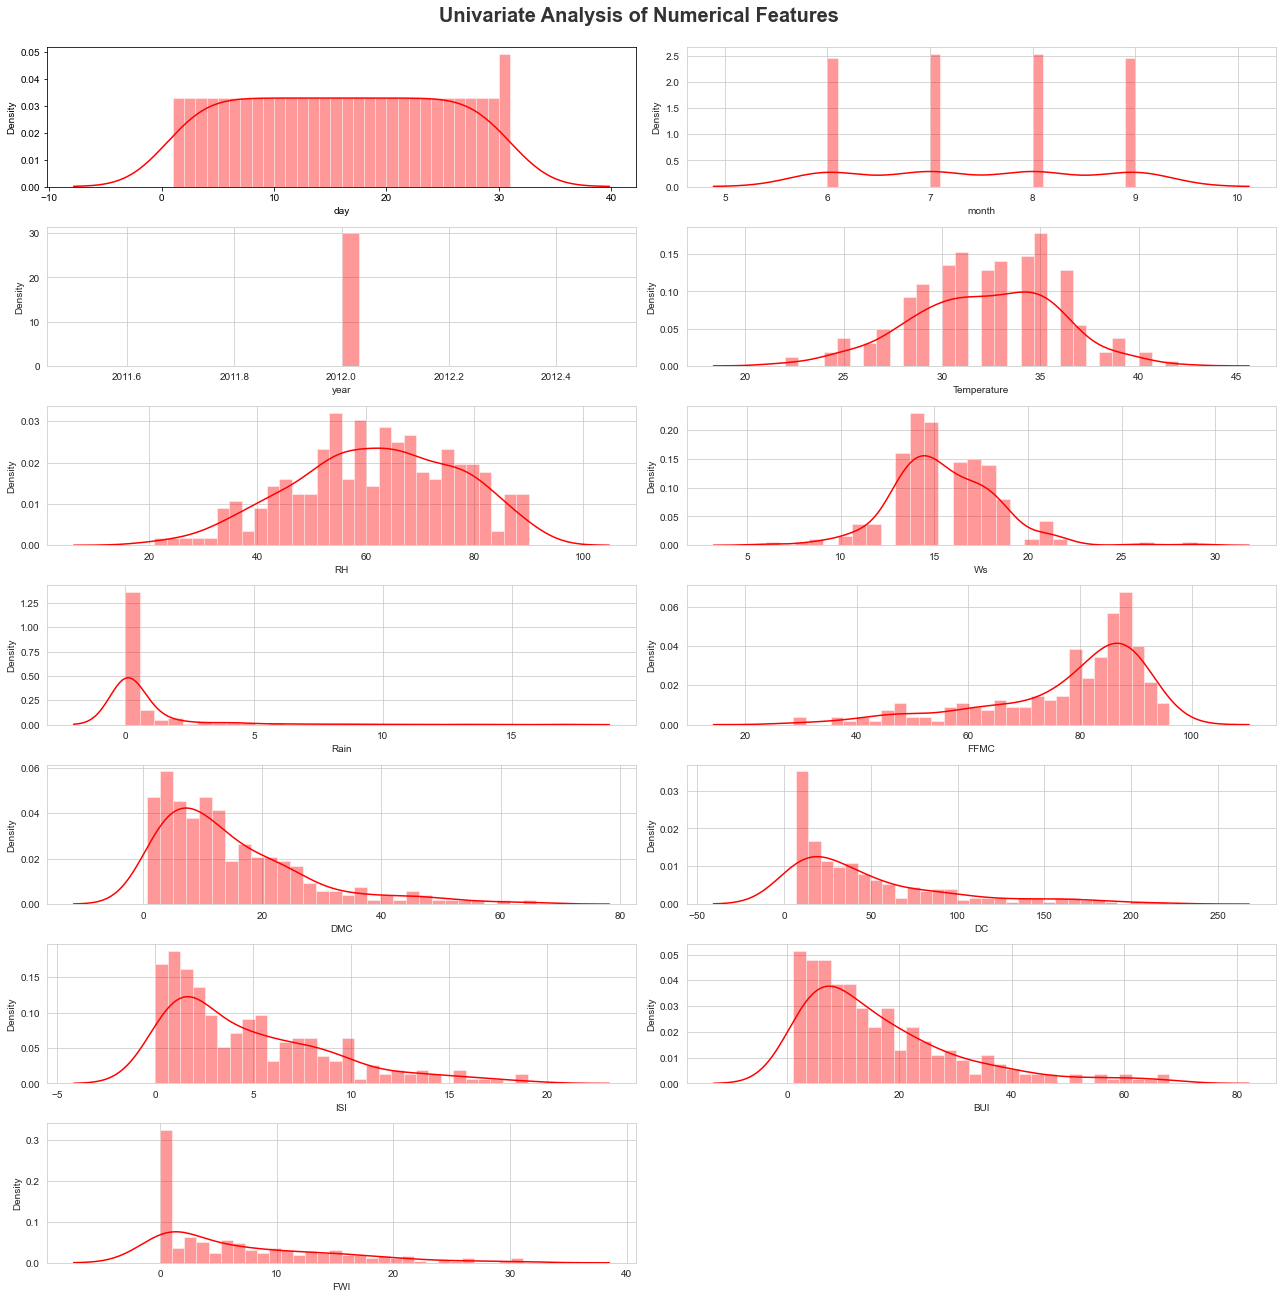

In [27]:
plt.figure(figsize=(18,18))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(7, 2, i+1)
    sns.set_style('whitegrid')
    sns.distplot(dataset_forest[numeric_features[i]], kde = True, color ='red', bins = 30)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()



### Observations:

#### Attribute Information:
- Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
- RH : Relative Humidity in %: 21 to 90
- Ws :Wind speed in km/h: 6 to 29
- Rain: total day in mm: 0 to 16.8
- FWI Components
- Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
- Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
- Drought Code (DC) index from the FWI system: 7 to 220.4
- Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
- Buildup Index (BUI) index from the FWI system: 1.1 to 68
- Fire Weather Index (FWI) Index: 0 to 31.1

#### Distribution Information:
- Temperature,RH,Ws is likely normal distribution but not fully normal distribution 
- FFMC data is left skewed distribution 
- DC,ISI,BUI,FWI,DMC data is right skewed distribution 
- Rain is likely log Normal distribution

<Figure size 1008x432 with 0 Axes>

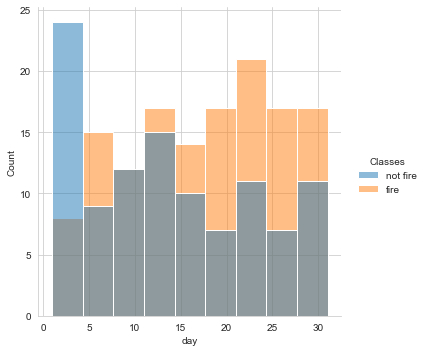

<Figure size 1008x432 with 0 Axes>

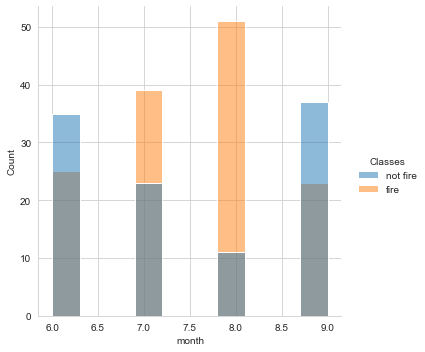

<Figure size 1008x432 with 0 Axes>

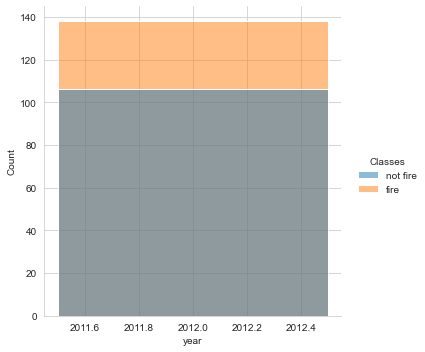

<Figure size 1008x432 with 0 Axes>

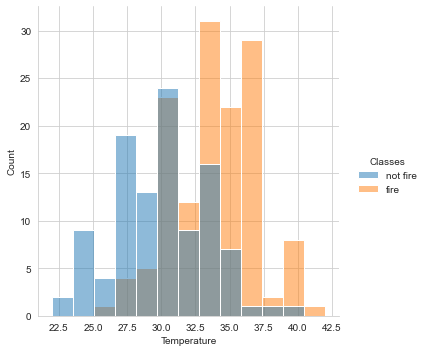

<Figure size 1008x432 with 0 Axes>

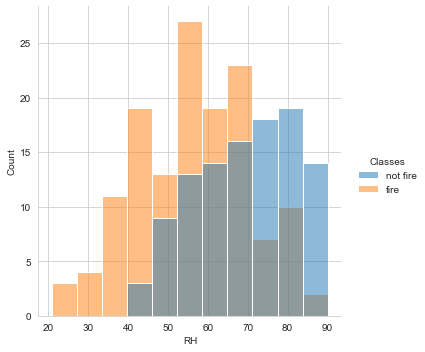

<Figure size 1008x432 with 0 Axes>

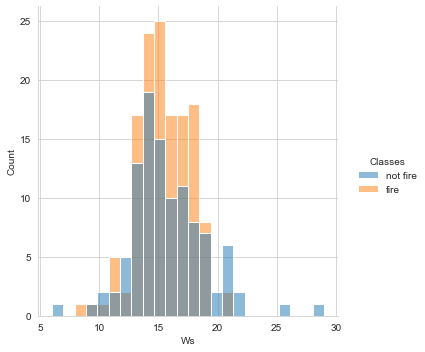

<Figure size 1008x432 with 0 Axes>

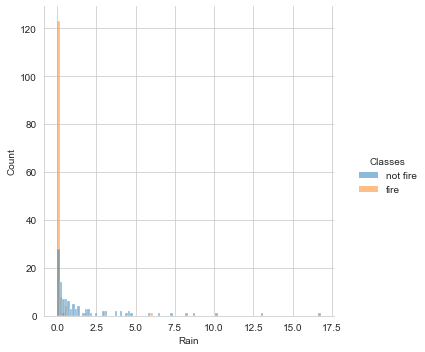

<Figure size 1008x432 with 0 Axes>

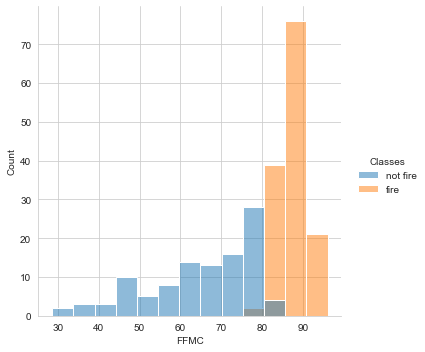

<Figure size 1008x432 with 0 Axes>

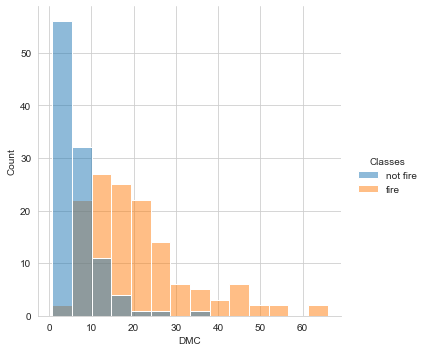

<Figure size 1008x432 with 0 Axes>

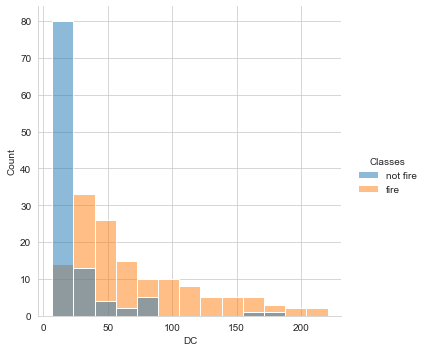

<Figure size 1008x432 with 0 Axes>

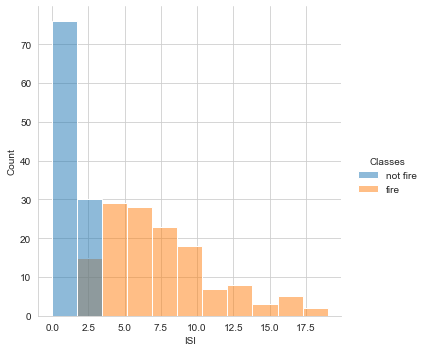

<Figure size 1008x432 with 0 Axes>

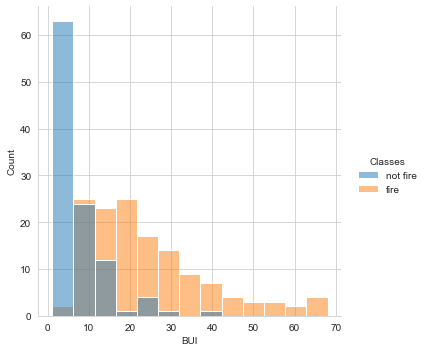

<Figure size 1008x432 with 0 Axes>

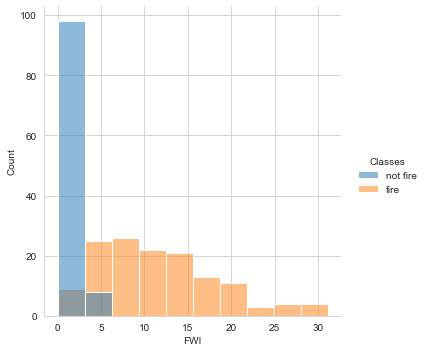

<Figure size 1008x432 with 0 Axes>

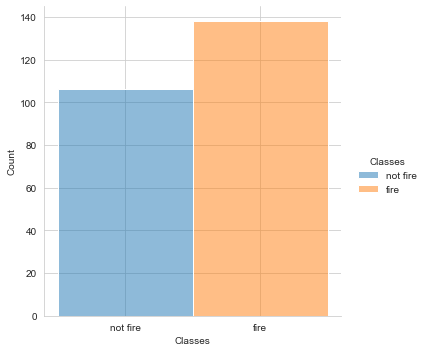

<Figure size 1008x432 with 0 Axes>

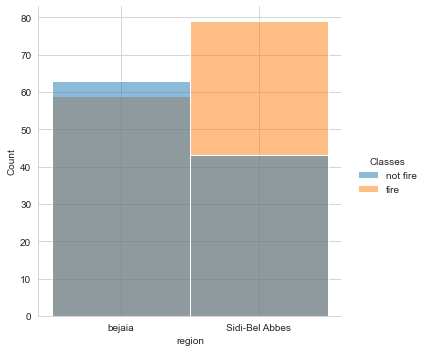

In [28]:
for i in dataset_forest.columns:
    plt.figure(figsize=(14,6))
    sns.displot(data=dataset_forest,x=i,hue='Classes',kind='hist')


### Observations::
- Most of the Fire happened in the month of August
- As per the plot, we can see that when the temperature is more than 35 then most of the Fires happened
- Most Fire cases occurred when the Relative Humidity is around 20% to 70%
- Most Fire cases occurred when the Wind speed is between 13 km/h to 20 km/h
- Rapidly increasing Fine Fuel Moisture (FFMC) is one of the most important causes of Fire cases
- When Initial Spread Index (ISI) is more than 5.0 then we can see most of the Fire cases
- When Buildup Index (BUI) is more than 10 then we can see most of the Fire cases
- When Fire Weather Index (FWI) is more than 10 then we can see most of the Fire cases
- The highest number of Fire cases occurred in the Sidi-Bel Abbes region


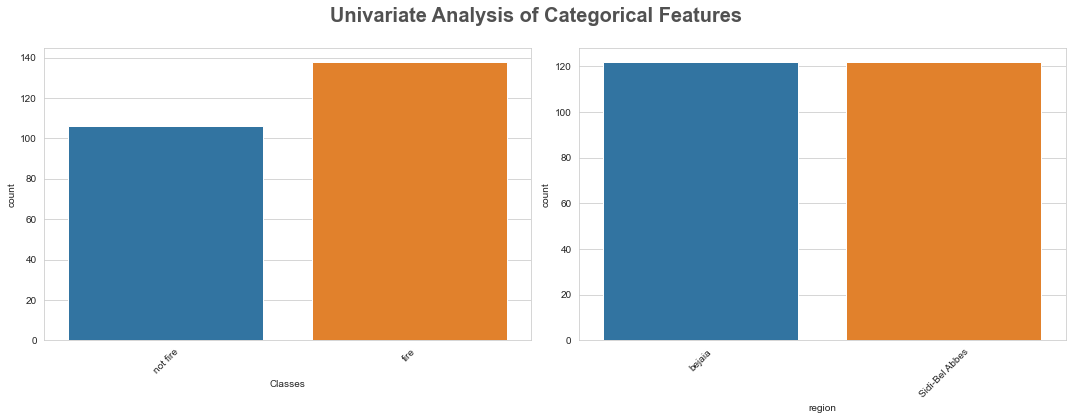

In [29]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=dataset_forest[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Multivariate Analysis

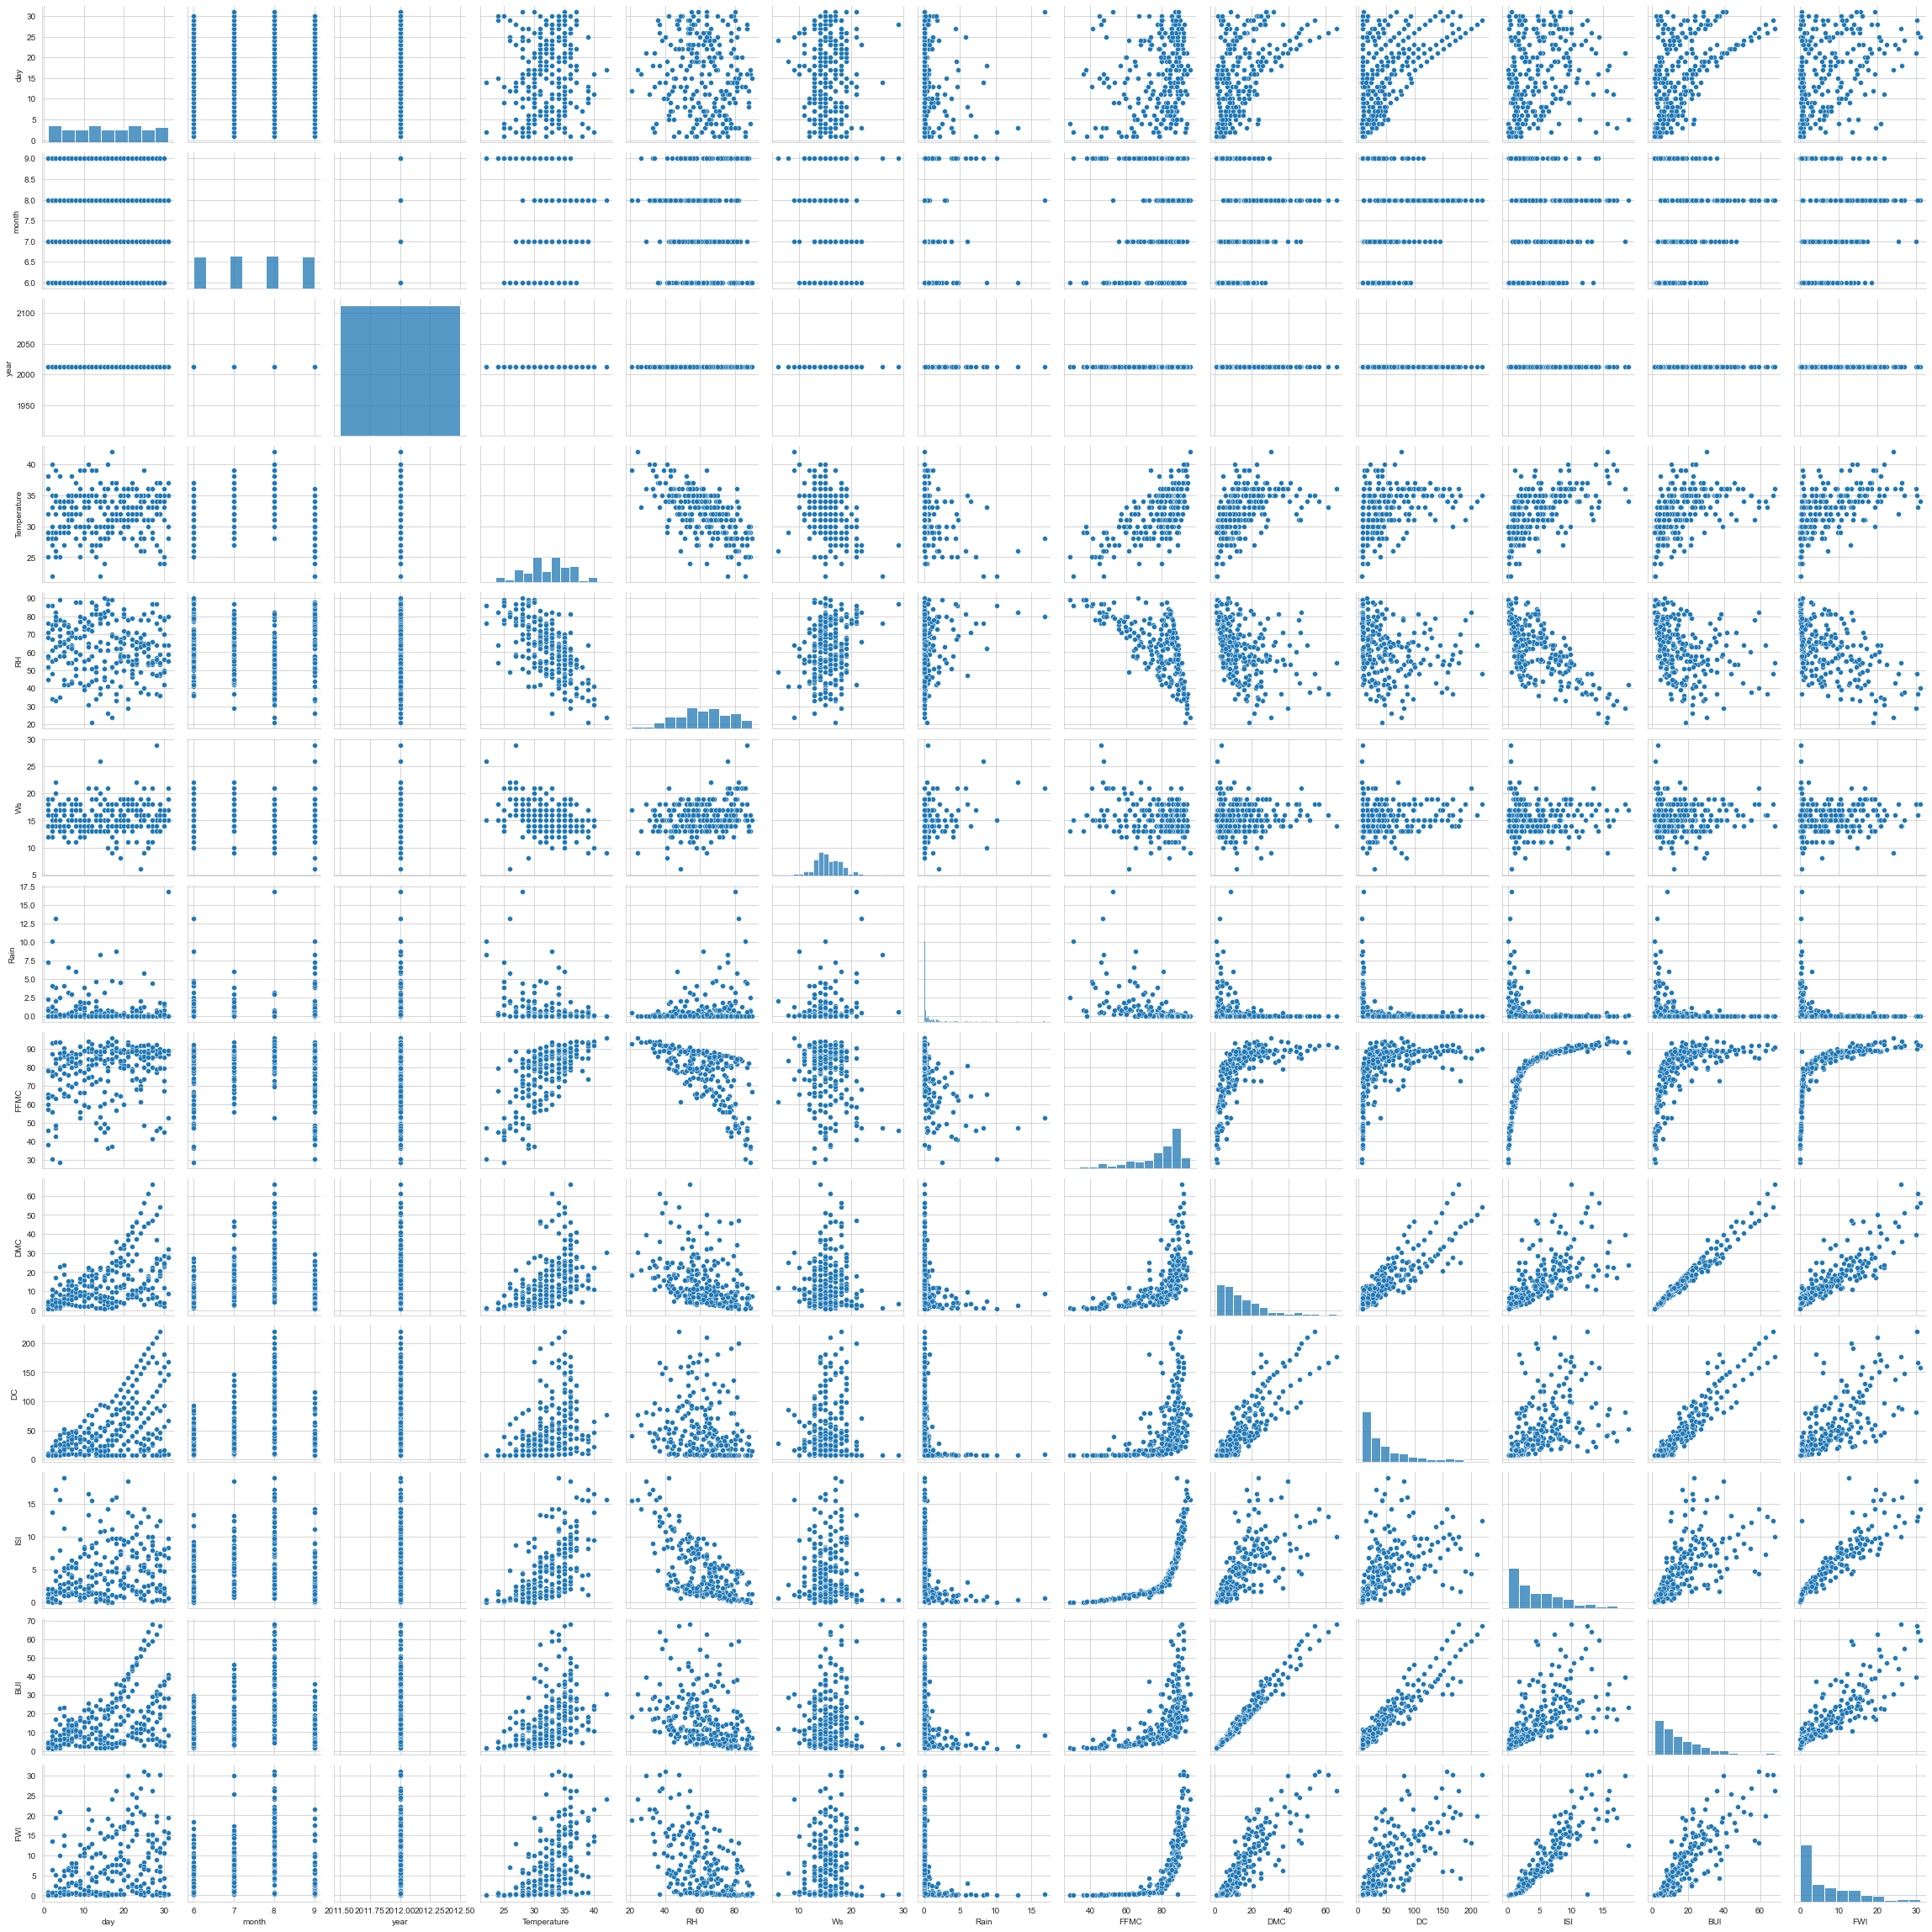

In [30]:
sns.pairplot(dataset_forest)

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

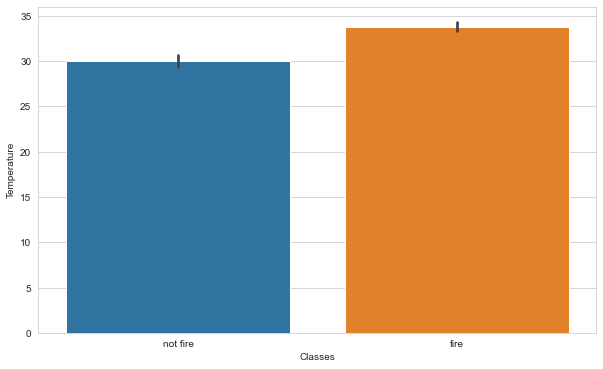

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x='Classes',y='Temperature',data=dataset_forest)

<AxesSubplot:xlabel='region', ylabel='Temperature'>

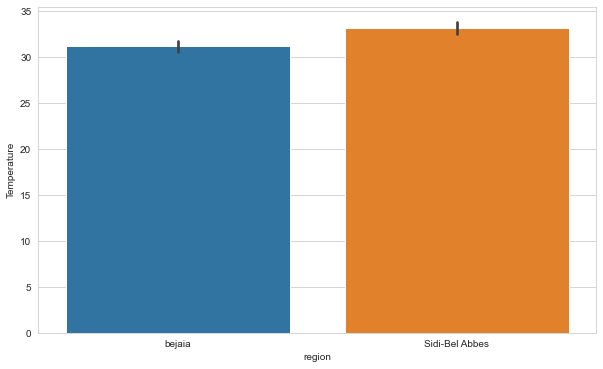

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='region',y='Temperature',data=dataset_forest)

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

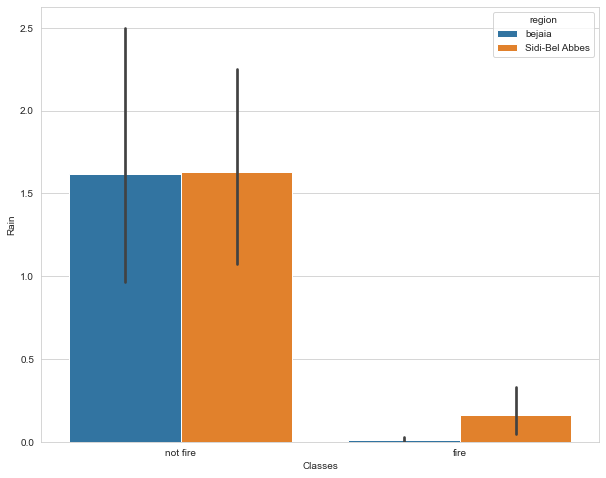

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(x='Classes',y='Rain',hue='region',data=dataset_forest)

<AxesSubplot:xlabel='month', ylabel='Temperature'>

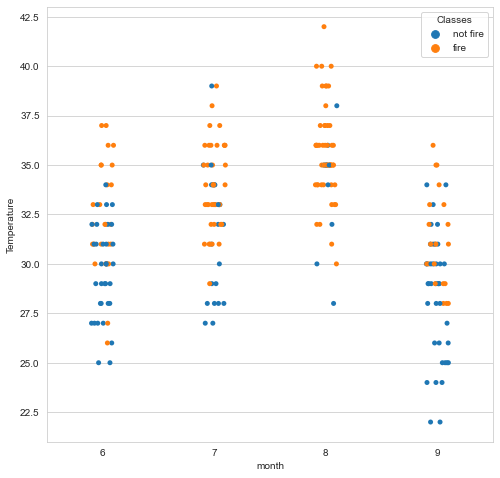

In [34]:
plt.figure(figsize=(8,8))
sns.stripplot(x='month',
    y='Temperature',
    hue='Classes',data=dataset_forest)

### Observations:
- The Temperature is high in the month of August, that's why fire cases also occurred
- The Temperature is falling in the month of September, so not many fire cases in the month of September


<AxesSubplot:xlabel='Ws', ylabel='Temperature'>

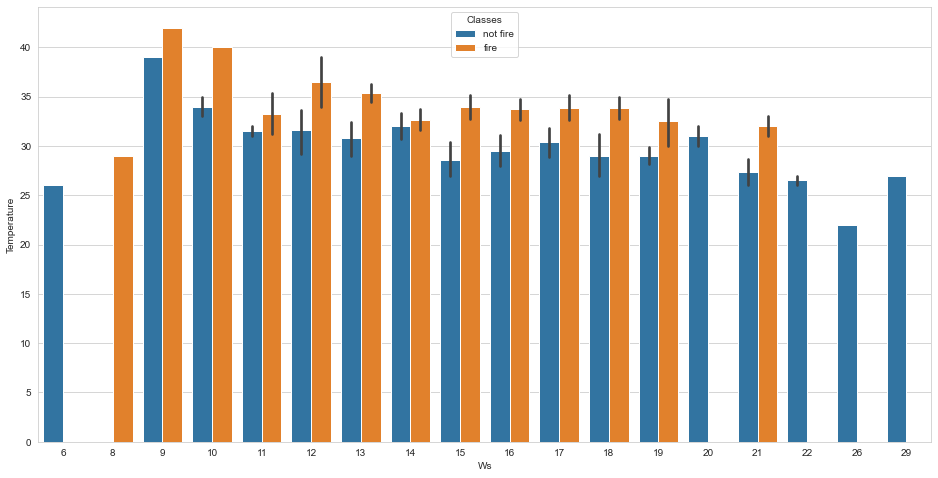

In [35]:
plt.figure(figsize=(16,8))
sns.barplot(x="Ws",
    y="Temperature",
    hue="Classes",
    data=dataset_forest)

# Observations:
- Fire cases started happening whenever wind speed is increased

<AxesSubplot:xlabel='Temperature', ylabel='count'>

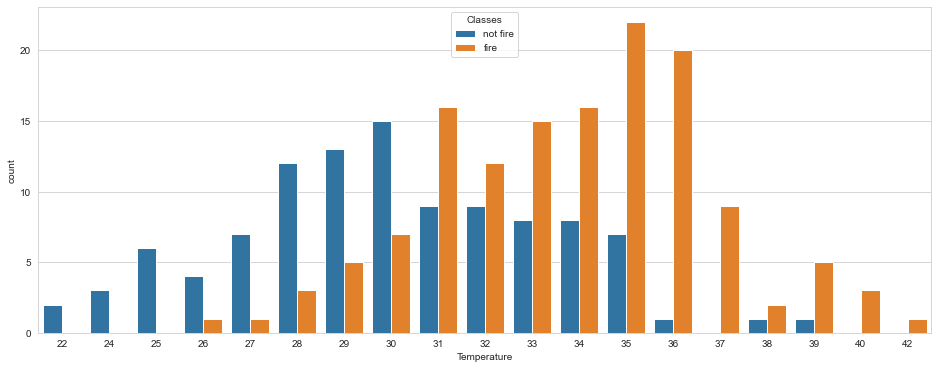

In [36]:
plt.figure(figsize=(16,6))
sns.countplot(x="Temperature",hue="Classes",data=dataset_forest)

<AxesSubplot:xlabel='Rain', ylabel='count'>

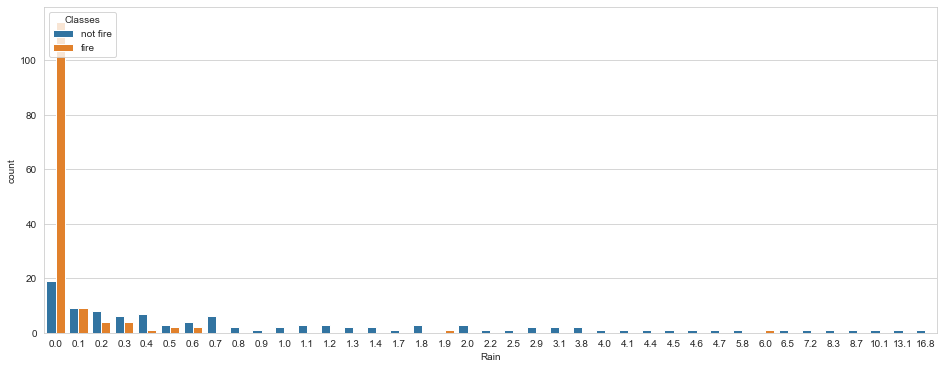

In [37]:
plt.figure(figsize=(16,6))
sns.countplot(x="Rain",hue="Classes",data=dataset_forest)

<AxesSubplot:xlabel='month', ylabel='Temperature'>

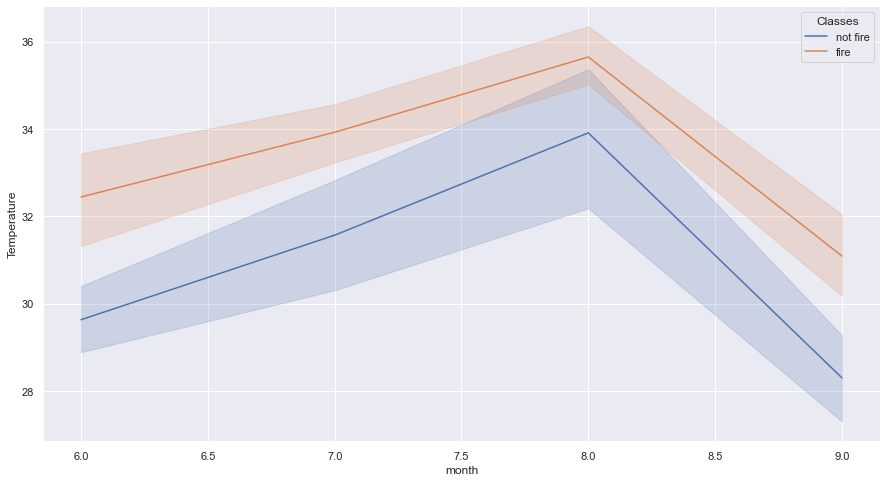

In [38]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x='month', y="Temperature",
             hue="Classes",
             data=dataset_forest)

# Observations:
- The number of fire cases increased when the temperature was above 32 degree during Auguest and the temperature decreased in The September

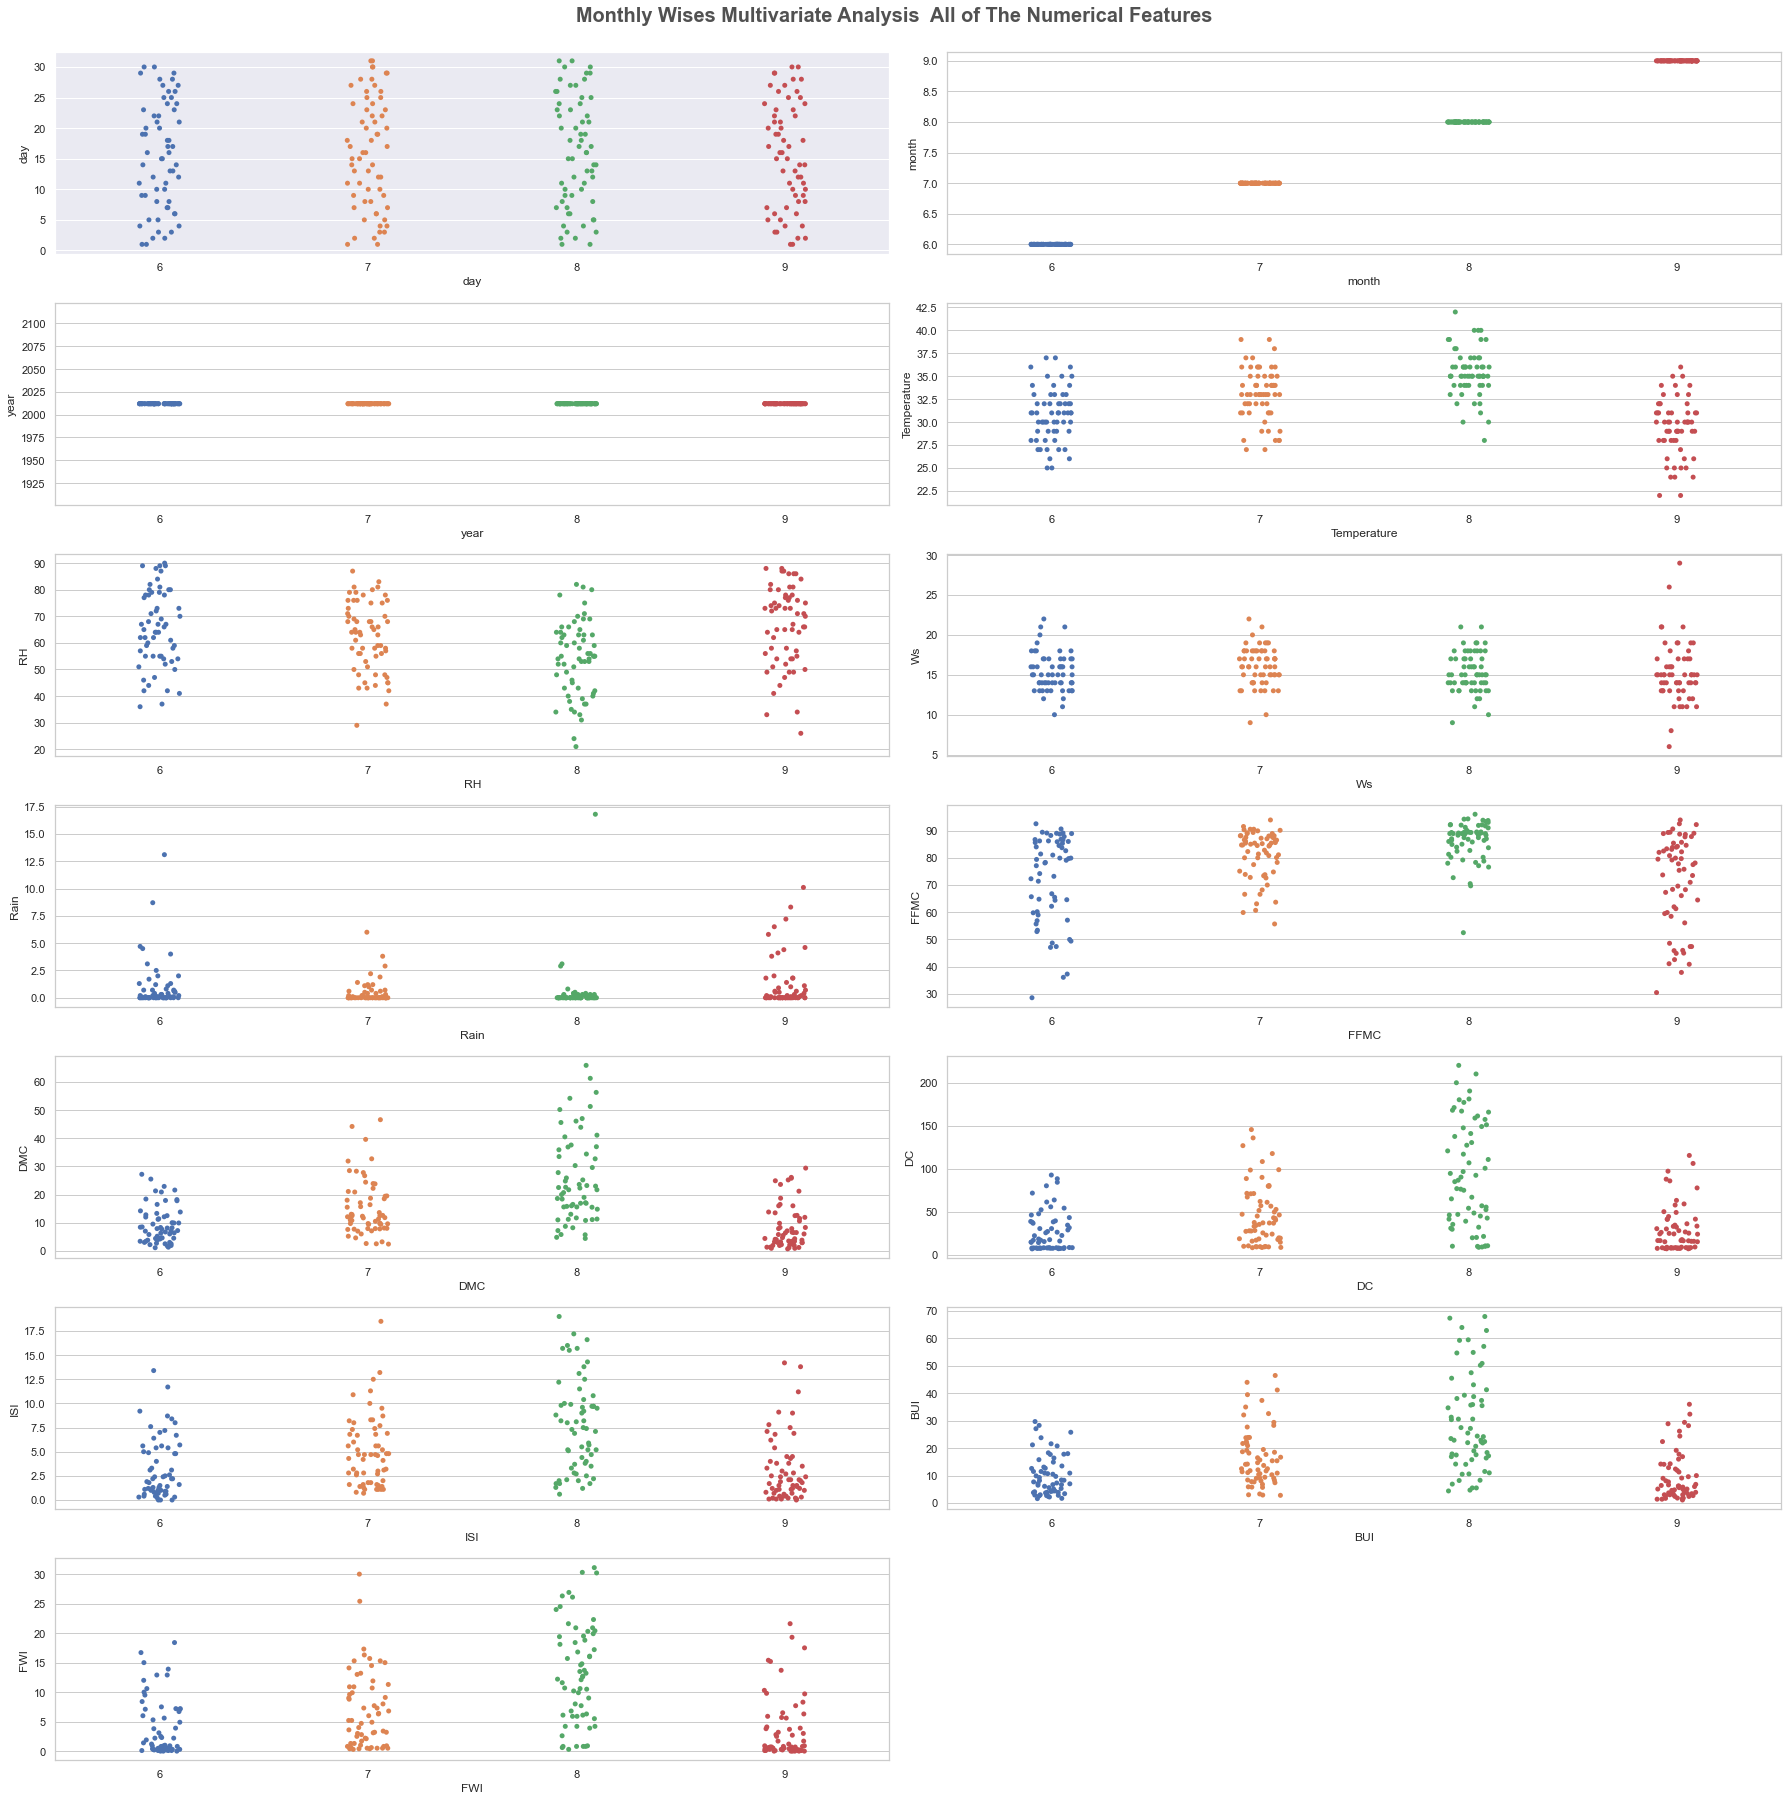

In [39]:
plt.figure(figsize=(25,25))
plt.suptitle('Monthly Wises Multivariate Analysis  All of The Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(7, 2, i+1)
    sns.set_style('whitegrid')
    #sns.distplot(dataset_forest[numeric_features[i]], kde = True, color ='red', bins = 30)
    sns.stripplot(x='month',y=numeric_features[i],data=dataset_forest)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


# Observations:
- In the Month of August Temperature was high and FWI Components were also high(FFMC, DMC,DC,ISI, BUI,FWI)
- Relative Humidity was high in the Month of june and September

<AxesSubplot:>

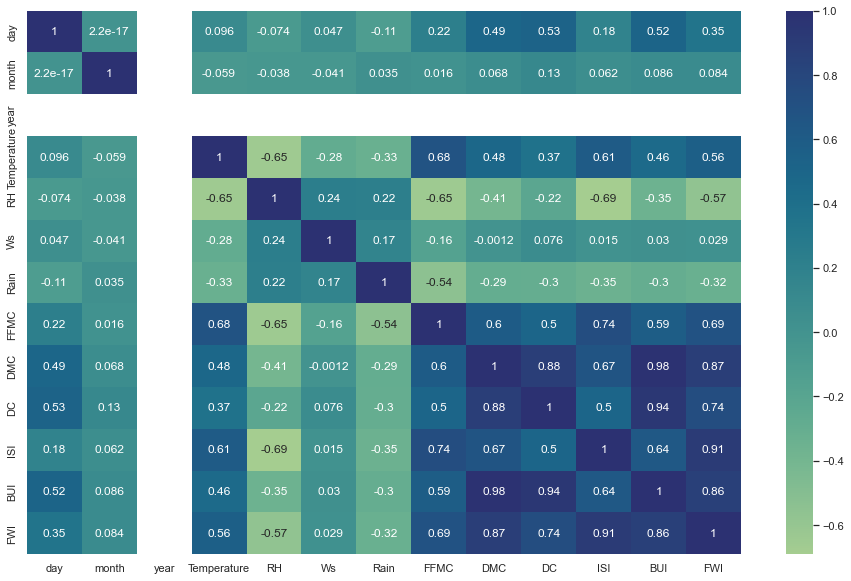

In [40]:
plt.figure(figsize = (16,10))
sns.heatmap(dataset_forest.corr(),cmap="crest", annot=True)

# Observations:
- DMC and BUI is highly +Ve Correlation
- DC and BUI also +Ve Correlation
- ISI and FWI also +Ve Correlation
- RH and DC is -Ve Correlation


In [41]:
dataset_forest['Date']=pd.to_datetime(dataset_forest[['day','month','year']])
dataset_forest.drop(['day','month','year'],axis=1,inplace=True)

### Handling Categorical Features

In [42]:
dataset_forest['Classes']=dataset_forest['Classes'].map({'not fire':0,'fire':1})

In [43]:
dataset_forest['region'].replace('bejaia',1,inplace=True)
dataset_forest['region'].replace('Sidi-Bel Abbes',0,inplace=True)

### Chceking the dataset is Balance or Imbalanced Data

Text(0, 0.5, 'Frequency')

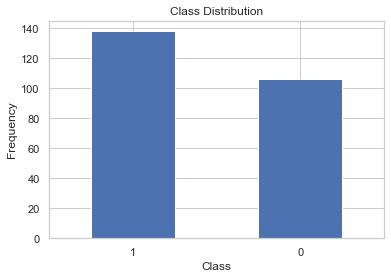

In [44]:
count_class = pd.value_counts(dataset_forest['Classes'],sort=True)
count_class.plot(kind='bar',rot=0)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

# Observations:
- As per the Frequency of the target variable, it is a normal dataset with 1 class around 130 and 0 class around 110


### Outlier Check

<AxesSubplot:>

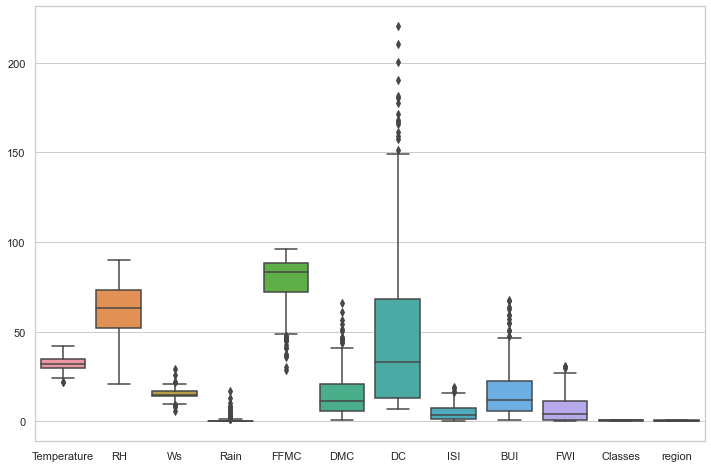

In [45]:
plt.figure(figsize=(12,8))
sns.boxplot(data=dataset_forest)

### Separating Outcome or Target Variable

In [46]:
y=dataset_forest["Classes"]

### Dropping unnecessary columns

In [47]:
dataset_forest=dataset_forest.drop(['Classes','Date'],axis=1)

In [48]:
dataset_forest.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'region'],
      dtype='object')

### Handleing the Outlier 

In [49]:
def Handle_outliers(dataset,column):
    IQR=dataset[column].quantile(0.75)-dataset[column].quantile(0.25)
    lower_fence=dataset[column].quantile(0.25)-(IQR*1.5)
    upper_fence=dataset[column].quantile(0.75)+(IQR*1.5)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    dataset_forest.loc[dataset[column]<=lower_fence,column]=lower_fence
    dataset_forest.loc[dataset[column]>=upper_fence,column]=upper_fence 

In [50]:
columns=dataset_forest.columns

In [51]:
for col in columns:
    Handle_outliers(dataset_forest,col)

IQR: 5.0
Lower Fence Temperature: 22.5
Upper Fence Temperature: 42.5
____________________________________________
IQR: 21.25
Lower Fence RH: 20.125
Upper Fence RH: 105.125
____________________________________________
IQR: 3.0
Lower Fence Ws: 9.5
Upper Fence Ws: 21.5
____________________________________________
IQR: 0.5
Lower Fence Rain: -0.75
Upper Fence Rain: 1.25
____________________________________________
IQR: 16.224999999999994
Lower Fence FFMC: 47.73750000000001
Upper Fence FFMC: 112.63749999999999
____________________________________________
IQR: 14.95
Lower Fence DMC: -16.624999999999996
Upper Fence DMC: 43.175
____________________________________________
IQR: 54.87500000000001
Lower Fence DC: -69.03750000000002
Upper Fence DC: 150.46250000000003
____________________________________________
IQR: 5.9
Lower Fence ISI: -7.450000000000001
Upper Fence ISI: 16.150000000000002
____________________________________________
IQR: 16.525
Lower Fence BUI: -18.787499999999998
Upper Fence BUI

<AxesSubplot:>

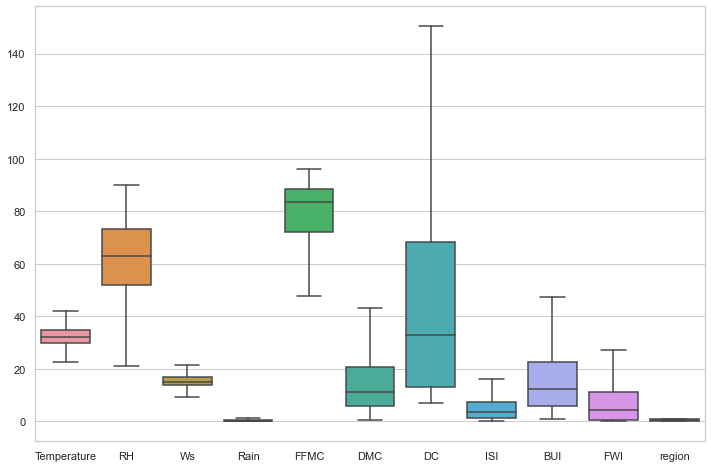

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(data=dataset_forest)

In [53]:
y.shape

(244,)

In [54]:
X=dataset_forest

In [55]:
X.shape

(244, 11)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

In [58]:
X_train.shape

(170, 11)

In [59]:
X_test.shape

(74, 11)

In [60]:
y_train.shape

(170,)

In [61]:
y_test.shape

(74,)

### Standardize features

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler=StandardScaler()

In [64]:
X_train=scaler.fit_transform(X_train)

In [65]:
X_test=scaler.transform(X_test)

In [66]:
X_train

array([[-1.87139667,  1.62190181,  2.15570343, ..., -1.11716349,
        -0.9508287 ,  0.94280904],
       [-0.5600305 ,  1.09821082,  1.76790493, ..., -0.914993  ,
        -0.89832019,  0.94280904],
       [-1.08457697,  1.22913357,  2.15570343, ..., -0.61173726,
        -0.91144732,  0.94280904],
       ...,
       [-0.5600305 ,  1.81828593,  0.21671093, ..., -1.13271507,
        -0.9508287 ,  0.94280904],
       [-2.52707976,  0.96728807,  2.34960268, ..., -1.13271507,
        -0.93770158,  0.94280904],
       [ 0.48906244, -0.53832354,  0.99230793, ...,  0.74902567,
         1.01824036,  0.94280904]])

In [67]:
X_test

array([[ 0.75133568, -1.78208964,  0.60450943, -0.6878656 ,  1.01507283,
         0.81352099,  1.16943313,  2.0517225 ,  1.02895404,  1.88463075,
        -1.06066017],
       [-0.5600305 ,  1.22913357,  1.38010643,  0.13418819, -1.24691026,
        -0.80779352, -0.70022726, -0.89197027, -0.79835618, -0.88519307,
         0.94280904],
       [-0.29775726,  0.05082883, -0.17108757, -0.6878656 ,  0.37597285,
        -0.75492457, -0.68392885, -0.26614582, -0.75947724, -0.53076064,
        -1.06066017],
       [ 1.01360891, -0.47286216, -0.55888608, -0.6878656 ,  0.92890205,
         2.53837053,  2.40723912,  1.17093254,  2.42179209,  2.47535147,
        -1.06066017],
       [-1.87139667,  0.96728807,  0.60450943,  1.88105251, -2.17773426,
        -1.1514417 , -0.92141996, -1.10057842, -1.11716349, -0.93770158,
         0.94280904],
       [-0.5600305 ,  0.31267433, -0.17108757, -0.27683871, -0.32775523,
        -0.90471993, -0.47670622, -0.79925553, -0.79058039, -0.85893881,
        -1.060

In [68]:
y_train

104    0
13     0
91     0
190    1
170    1
      ..
42     0
68     0
16     0
105    0
26     1
Name: Classes, Length: 170, dtype: int64

In [69]:
y_test

234    1
44     0
220    1
209    1
92     0
      ..
166    1
164    1
63     0
153    1
33     0
Name: Classes, Length: 74, dtype: int64

In [70]:
log_reg=LogisticRegression()

In [71]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [72]:
print(log_reg.coef_)

[[ 0.31556568  0.36701972  0.06643531 -0.15846261  2.27420466  0.02276405
   0.04608258  2.17916419 -0.0092186   1.64441524 -0.17467832]]


In [73]:
print(log_reg.intercept_)

[1.35152071]


In [74]:
log_reg_pred=log_reg.predict(X_test)

### Confusion Matrix

In [75]:
confusion_mat=confusion_matrix(y_test,log_reg_pred)

In [76]:
print(confusion_mat)

[[31  1]
 [ 0 42]]


In [77]:
print("Accuracy :",accuracy_score(y_test,log_reg_pred))


Accuracy : 0.9864864864864865


# Accuracy : 0.9864

In [78]:
TP=confusion_mat[0][0]
FP=confusion_mat[0][1]
FN=confusion_mat[1][0]
TN=confusion_mat[1][1]

### Precision

In [79]:
Precision=TP/(TP+FP)

In [80]:
print(Precision)

0.96875


# Precision : 0.968

### Recall

In [81]:
Recall = TP/(TP+FN)

In [82]:
print(Recall)

1.0


# Recall : 1.0

### F1 Score

In [83]:
F1_score = 2*(Recall * Precision)/(Recall+Precision)

In [84]:
print(F1_score)

0.9841269841269841


# F1 Score : 0.9841

### Actual and Prediction Dataset

In [85]:
DF=pd.DataFrame({'Actual':y_test,'Predicted':log_reg_pred})

In [86]:
DF.head(15)

,Actual,Predicted
234,1,1
44,0,0
220,1,1
209,1,1
92,0,0
217,0,0
232,1,1
75,1,1
142,1,1
132,1,1


# Thank You